<a href="https://colab.research.google.com/github/BaimYow/SKPI-ML/blob/main/klasifikasi_stress_non_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!kaggle datasets download -d preritbhagat/stress-non-stress-images -p /content/ --force


Dataset URL: https://www.kaggle.com/datasets/preritbhagat/stress-non-stress-images
License(s): apache-2.0
 98% 561M/573M [00:06<00:00, 80.7MB/s]
100% 573M/573M [00:06<00:00, 91.5MB/s]


In [4]:
import zipfile
zip_path = '/content/stress-non-stress-images.zip'
extract_to = '/content/data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [7]:
import os
import shutil

def copy_tree(src_dir, dest_dir):
    """ Salin semua file dan folder dari src_dir ke dest_dir """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for item in os.listdir(src_dir):
        s = os.path.join(src_dir, item)
        d = os.path.join(dest_dir, item)
        if os.path.isdir(s):
            # Jika item adalah folder, salin folder dan isinya
            shutil.copytree(s, d, dirs_exist_ok=True)
        else:
            # Jika item adalah file, salin file
            shutil.copy2(s, d)

# Path ke folder
# Corrected the paths to the training and test directories
train_dir = '/content/data/training_set'  # Removed extra 'training_set' from the path
test_dir = '/content/data/test_set'    # Removed extra 'test_set' from the path
dataset_dir = '/content/data/datasets'

# Salin folder dari training_set dan test_set ke datasets
copy_tree(train_dir, dataset_dir)
copy_tree(test_dir, dataset_dir)

print("Penggabungan selesai!")

Penggabungan selesai!


In [11]:
import os
import shutil
from pathlib import Path
import pandas as pd
dataset = "/content/data/datasets"
directory_path = Path(dataset)
filepaths_png = list(directory_path.glob(r'**/*.png'))
filepaths_jpeg = list(directory_path.glob(r'**/*.jpg')) + list(directory_path.glob(r'**/*.jpeg'))
filepaths = filepaths_png + filepaths_jpeg
labels = [os.path.split(os.path.split(x)[0])[1] for x in filepaths]
filepaths = pd.DataFrame(filepaths, columns=['Filepath']).astype(str)
labels = pd.DataFrame(labels, columns=['Label'])
image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop=True)
image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop=True)
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  0 non-null      object
 1   Label     0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


In [15]:
import os

# Pastikan path dataset benar
dataset_path = "/content/data/"  # Sesuaikan dengan lokasi dataset kamu

def list_folders_in_directory(directory):
    folders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    return sorted(folders)

print(list_folders_in_directory(dataset_path))


['.ipynb_checkpoints', 'FINAL_TFEID', 'KDEF', 'datasets', 'test_set', 'training_set']


In [16]:
import os

directory_path = "/content/data/datasets"

# Cek apakah folder ada
if os.path.exists(directory_path):
    for class_name in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_name)
        if os.path.isdir(class_path):
            files = os.listdir(class_path)
            print(f"📁 {class_name}: {len(files)} files")
else:
    print("❌ Directory tidak ditemukan!")


📁 .ipynb_checkpoints: 0 files
📁 dataset_img: 0 files


⚠️ Kelas .ipynb_checkpoints hanya memiliki 0 gambar.
⚠️ Kelas dataset_img hanya memiliki 0 gambar.


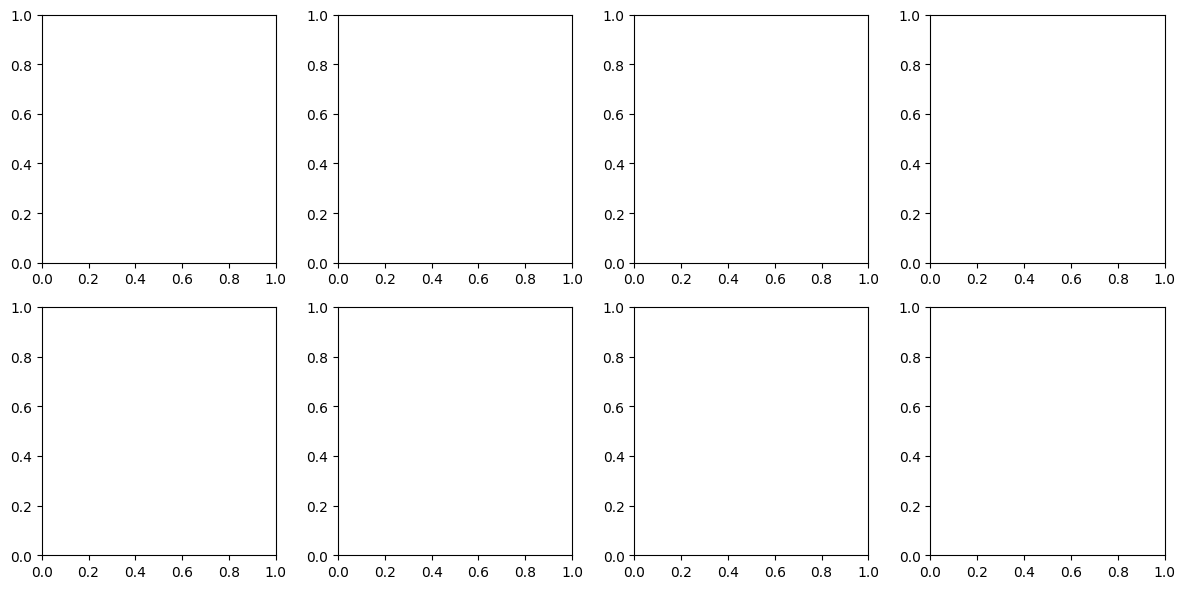

In [18]:
import matplotlib.pyplot as plt
import random
from PIL import Image

directory_path = "/content/data/datasets"

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i, class_name in enumerate(os.listdir(directory_path)):
    class_path = os.path.join(directory_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)

        if len(images) < 4:
            print(f"⚠️ Kelas {class_name} hanya memiliki {len(images)} gambar.")
            continue

        for j in range(4):
            img_path = os.path.join(class_path, random.choice(images))
            img = Image.open(img_path)
            axs[i, j].imshow(img)
            axs[i, j].set_title(class_name)
            axs[i, j].axis("off")
            img.close()

plt.tight_layout()
plt.show()


In [19]:
import zipfile

zip_path = "/content/stress-non-stress-images.zip"  # Path file ZIP
extract_to = "/content/data/"  # Folder tujuan ekstrak

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset berhasil diekstrak!")


✅ Dataset berhasil diekstrak!


In [20]:
import os

dataset_path = "/content/data/"

print("📂 Isi dataset:")
print(os.listdir(dataset_path))


📂 Isi dataset:
['datasets', 'KDEF', '.ipynb_checkpoints', 'FINAL_TFEID', 'training_set', 'test_set']


In [22]:
stress_path = "/content/data/Stress"
non_stress_path = "/content/data/Non-Stress"

print(f"📸 Jumlah gambar dalam Stress: {len(os.listdir(stress_path))}")
print(f"📸 Jumlah gambar dalam Non-Stress: {len(os.listdir(non_stress_path))}")

📸 Jumlah gambar dalam Stress: 0
📸 Jumlah gambar dalam Non-Stress: 0


In [28]:
import os

zip_path = "/content/stress-non-stress-images.zip"

if os.path.exists(zip_path):
    print("✅ File ZIP ditemukan!")
else:
    print("❌ File ZIP tidak ditemukan! Coba download ulang.")


✅ File ZIP ditemukan!


In [25]:
import zipfile

zip_path = "/content/stress-non-stress-images.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("📂 Isi file ZIP:")
    print(zip_ref.namelist()[:10])  # Menampilkan 10 file pertama


📂 Isi file ZIP:
['FINAL_TFEID/FINALTFEID_NONSTRESS/f01_dfh_hx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f01_dfh_nx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f01_dfs_h.JPG', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f02_dfh_hx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f02_dfh_nx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f02_dfs_h.JPG', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f03_dfh_hx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f03_dfh_nx.jpg', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f03_dfs_h.JPG', 'FINAL_TFEID/FINALTFEID_NONSTRESS/f04_dfh_hx.jpg']


In [26]:
import zipfile
import os

zip_path = "/content/stress-non-stress-images.zip"
extract_to = "/content/data"

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Ekstraksi selesai!")

# Cek apakah folder sudah benar
print("Isi folder setelah ekstraksi:", os.listdir(extract_to))


Ekstraksi selesai!
Isi folder setelah ekstraksi: ['datasets', 'KDEF', '.ipynb_checkpoints', 'FINAL_TFEID', 'Non-Stress', 'training_set', 'test_set', 'Stress']


In [27]:
import shutil

src_folder = "/content/data/FINAL_TFEID"
dst_folder = "/content/dataset"

os.makedirs(dst_folder, exist_ok=True)

# Pastikan folder kategori ada
categories = ["FINALTFEID_STRESS", "FINALTFEID_NONSTRESS"]
for category in categories:
    src_path = os.path.join(src_folder, category)
    dst_path = os.path.join(dst_folder, "stress" if "STRESS" in category else "non_stress")

    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

print("Data telah dipindahkan ke:", os.listdir(dst_folder))


Data telah dipindahkan ke: ['stress']


In [29]:
import os

dataset_path = "/content/dataset"  # Sesuaikan dengan path dataset kamu

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):  # Pastikan hanya folder yang dicek
        images = os.listdir(category_path)
        print(f"Kategori: {category} - Jumlah gambar: {len(images)}")

        # Tampilkan beberapa contoh gambar
        sample_images = images[:5]  # Ambil 5 gambar pertama
        print("Contoh gambar:", sample_images)
        print("-" * 50)


Kategori: stress - Jumlah gambar: 236
Contoh gambar: ['f16_dfh_ax.jpg', 'f12_dfs_f.jpg', 'f14_dfs_f.jpg', 'm09_dfs_a.JPG', 'm06_dfs_a.JPG']
--------------------------------------------------


In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

directory_path = "/content/dataset"  # Ganti dengan lokasi dataset kamu

dataset_img = {}

# Cek apakah direktori dataset ada
if not os.path.exists(directory_path):
    print("Error: Direktori dataset tidak ditemukan!")
else:
    # Loop untuk membaca daftar kelas dalam dataset
    for class_name in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_name)

        # Pastikan hanya mengambil folder (bukan file lain)
        if os.path.isdir(class_path):
            image_list = os.listdir(class_path)

            # Pastikan ada gambar dalam folder
            if len(image_list) > 0:
                dataset_img[class_name] = image_list

    # Pastikan ada kelas yang cukup untuk dipilih
    if len(dataset_img) < 2:
        print("Error: Tidak cukup kelas untuk ditampilkan!")
    else:
        # Pilih dua kelas secara acak
        random_classes = np.random.choice(list(dataset_img.keys()), 2, replace=False)

        # Buat subplot
        fig, axs = plt.subplots(len(random_classes), 4, figsize=(9, 9))

        for i, class_name in enumerate(random_classes):
            images = np.random.choice(dataset_img[class_name], min(4, len(dataset_img[class_name])), replace=False)

            for j, image_name in enumerate(images):
                img_path = os.path.join(directory_path, class_name, image_name)

                # Buka gambar
                img = Image.open(img_path)
                axs[i, j].imshow(img)
                axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])
                img.close()

        fig.tight_layout()
        plt.show()


Error: Tidak cukup kelas untuk ditampilkan!


In [33]:
import os

directory_path = "/content/dataset"  # Pastikan ini sesuai dengan lokasi dataset kamu

if os.path.exists(directory_path):
    print("Isi folder dataset:")
    print(os.listdir(directory_path))
else:
    print("Error: Folder dataset tidak ditemukan!")


Isi folder dataset:
['.ipynb_checkpoints', 'Non-Stress', 'stress']


In [35]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

directory_path = "/content/dataset"  # Sesuaikan dengan folder dataset kamu
dataset_img = {}

# Loop untuk menyimpan daftar gambar dalam setiap kelas
for class_name in os.listdir(directory_path):
    class_path = os.path.join(directory_path, class_name)

    # Pastikan hanya membaca folder kelas, bukan file atau .ipynb_checkpoints
    if os.path.isdir(class_path) and class_name != ".ipynb_checkpoints":
        images = os.listdir(class_path)

        # Hanya tambahkan jika ada gambar di dalamnya
        if images:
            dataset_img[class_name] = images

# Cek apakah ada cukup kelas untuk ditampilkan
if len(dataset_img) < 2:
    print("Error: Tidak cukup kelas untuk ditampilkan!")
else:
    # Pilih 2 kelas secara acak
    random_classes = np.random.choice(list(dataset_img.keys()), 2, replace=False)

    fig, axs = plt.subplots(len(random_classes), 4, figsize=(9, 9))

    for i, class_name in enumerate(random_classes):
        images = np.random.choice(dataset_img[class_name], 4, replace=False)

        for j, image_name in enumerate(images):
            img_path = os.path.join(directory_path, class_name, image_name)

            # Pastikan file adalah gambar sebelum dibuka
            try:
                img = Image.open(img_path)
                axs[i, j].imshow(img)
                axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])
                img.close()
            except:
                print(f"Error membuka gambar: {img_path}")

    fig.tight_layout()
    plt.show()



Error: Tidak cukup kelas untuk ditampilkan!


In [36]:
import os

directory_path = "/content/dataset"  # Sesuaikan dengan path dataset kamu

# Cek folder utama
print("Isi folder dataset:", os.listdir(directory_path))

# Cek isi folder setiap kelas
for class_name in os.listdir(directory_path):
    class_path = os.path.join(directory_path, class_name)
    if os.path.isdir(class_path):
        print(f"Isi folder '{class_name}':", os.listdir(class_path))


Isi folder dataset: ['.ipynb_checkpoints', 'Non-Stress', 'stress']
Isi folder '.ipynb_checkpoints': []
Isi folder 'Non-Stress': []
Isi folder 'stress': ['f16_dfh_ax.jpg', 'f12_dfs_f.jpg', 'f14_dfs_f.jpg', 'm09_dfs_a.JPG', 'm06_dfs_a.JPG', 'f15_dfh_dx.jpg', 'f1_dfs_d.jpg', 'm19_dfh_fx.jpg', 'f20_dfh_dx.jpg', 'm11_dfs_a.JPG', 'f02_dfh_dx.jpg', 'm08_dfh_dx.jpg', 'm02_dfs_a.JPG', 'm09_dfs_f.jpg', 'm12_dfs_f.jpg', 'f08_dfh_fx.jpg', 'm05_dfh_dx.jpg', 'm19_dfh_dx.jpg', 'f03_dfh_fx.jpg', 'f16_dfh_fx.jpg', 'm11_dfh_dx.jpg', 'm09_dfh_dx.jpg', 'f07_dfs_a.JPG', 'f06_dfs_f.jpg', 'f17_dfs_f.jpg', 'f20_dfh_ax.jpg', 'f21_dfs_d.jpg', 'f18_dfh_dx.jpg', 'm16_dfh_dx.jpg', 'f06_dfs_a.JPG', 'f20_dfs_a.JPG', 'f10_dfs_d.jpg', 'f09_dfh_fx.jpg', 'm11_dfh_fx.jpg', 'f18_dfs_f.jpg', 'm05_dfh_fx.jpg', 'f10_dfs_a.JPG', 'm05_dfs_a.JPG', 'f18_dfs_a.JPG', 'f17_dfs_a.JPG', 'm15_dfs_f.jpg', 'm19_dfs_a.JPG', 'f7_dfs_d.jpg', 'm07_dfs_f.jpg', 'm15_dfs_a.JPG', 'm18_dfh_fx.jpg', 'm20_dfs_a.JPG', 'f20_dfs_d.jpg', 'm4_dfs_d.jpg

In [38]:
import shutil
import random

dataset_path = "/content/dataset"
stress_path = os.path.join(dataset_path, "stress")
non_stress_path = os.path.join(dataset_path, "Non-Stress")

# Pastikan folder Non-Stress ada
os.makedirs(non_stress_path, exist_ok=True)

# Ambil sebagian gambar dari "stress" untuk dipindahkan ke "Non-Stress"
stress_images = os.listdir(stress_path)
num_to_move = min(50, len(stress_images))  # Pindahkan 50 gambar (atau semua jika kurang dari 50)

if num_to_move > 0:
    selected_images = random.sample(stress_images, num_to_move)
    for img in selected_images:
        src_path = os.path.join(stress_path, img)
        dest_path = os.path.join(non_stress_path, img)
        shutil.move(src_path, dest_path)

    print(f"{num_to_move} gambar telah dipindahkan ke 'Non-Stress'.")
else:
    print("Tidak ada gambar di folder 'stress' untuk dipindahkan.")


50 gambar telah dipindahkan ke 'Non-Stress'.


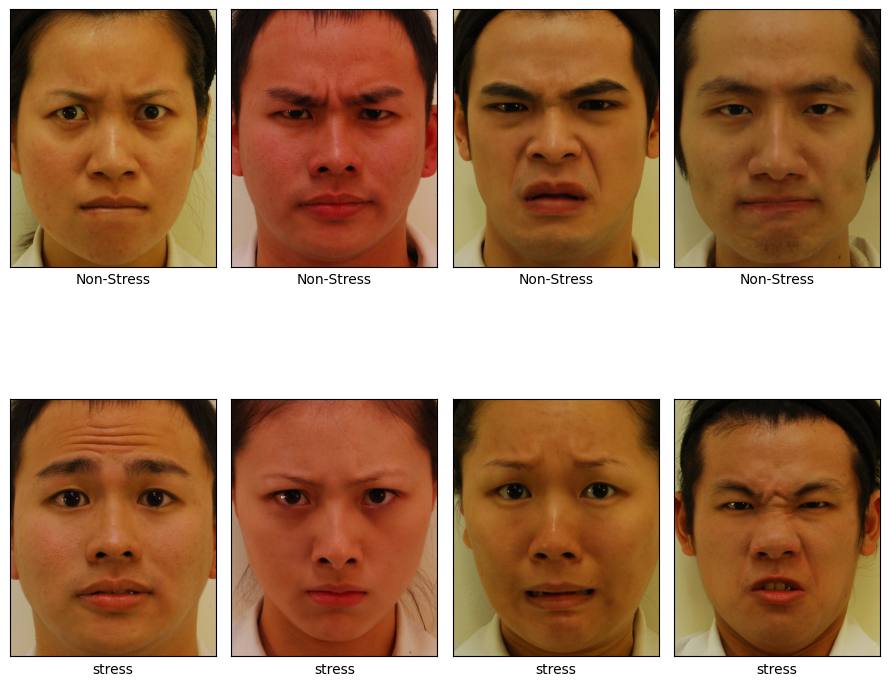

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

directory_path = "/content/dataset"  # Sesuaikan dengan path dataset

dataset_img = {}

# Membaca daftar gambar dalam setiap kelas
for class_name in os.listdir(directory_path):
    class_path = os.path.join(directory_path, class_name)
    if os.path.isdir(class_path):  # Hanya ambil folder, bukan file lain
        dataset_img[class_name] = os.listdir(class_path)

# Pilih 2 kelas secara acak
random_classes = np.random.choice(list(dataset_img.keys()), 2, replace=False)

fig, axs = plt.subplots(len(random_classes), 4, figsize=(9, 9))

for i, class_name in enumerate(random_classes):
    images = np.random.choice(dataset_img[class_name], 4, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(directory_path, class_name, image_name)  # Perbaiki pemisahan baris
        img = Image.open(img_path)

        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

        img.close()

fig.tight_layout()
plt.show()
